### A simple effort to explore and then classify the Iris dataset with the pydata stack

In [24]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import altair
import seaborn as sb
df = pd.read_csv("iris_data.csv", header=None, names=["sepal_length", "sepal_width",
                                                      "petal_length", "petal_width",
                                                      "class"])
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## We've collected the data, now to explore it

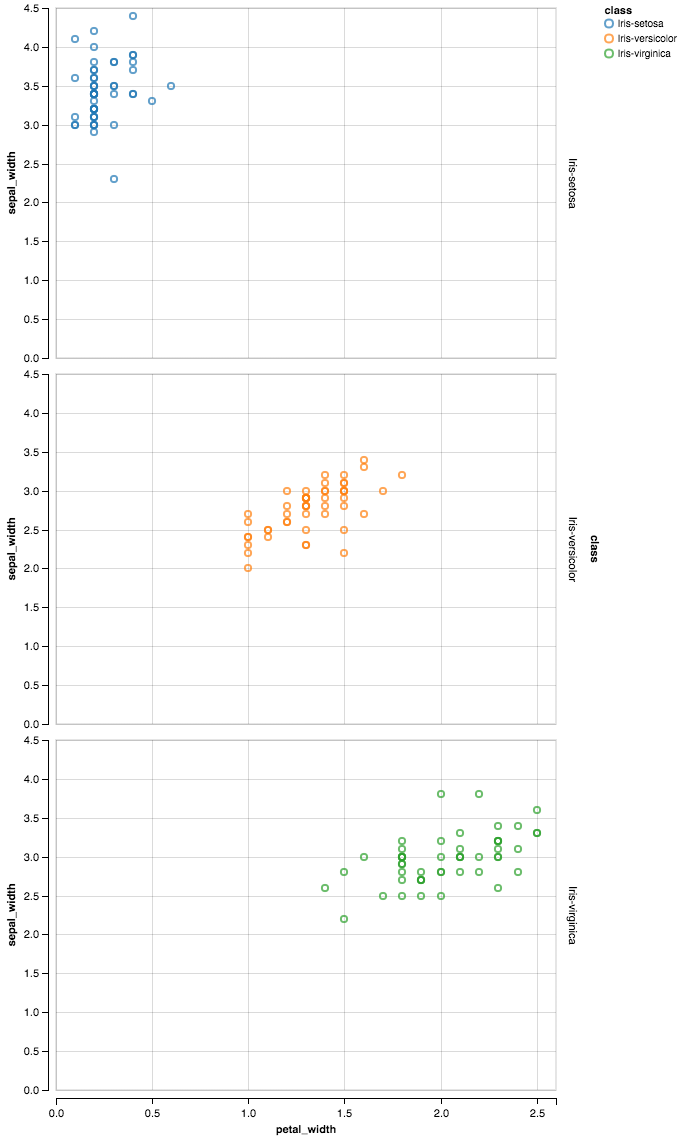

In [18]:
altair.Chart(df).mark_point().encode(
    y="sepal_width",
    x="petal_width",
    row="class",
    color="class")

It looks as though it's possible to break up the data to distinguish between classes, although there's potentially some overlap between iris-versicolor and iris-verginica. Can we use a simple machine learning technique to classify the data?

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance

def fit_and_test_model(cls, train_X, train_y, test_X, test_y):
    """This is a framework to fit and test models against the training data"""
    mod = cls.fit(train_X, train_y)
    predictions = mod.predict(test_X)
    
    print classification_report(y_true=test_y, y_pred=predictions)
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    vis = ClassBalance(mod, classes=classes)
    #
    
    vis.fit(X_train, y_train)  # Fit the training data to the visualizer
    vis.score(X_test, y_test)  # Evaluate the model on the test data 
    g = vis.poof()             # Draw/show/poof the data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df[["sepal_length", "sepal_width",
                                                      "petal_length", "petal_width"]], df['class'], random_state=42)

## Decision Trees

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

    avg / total       1.00      1.00      1.00        38



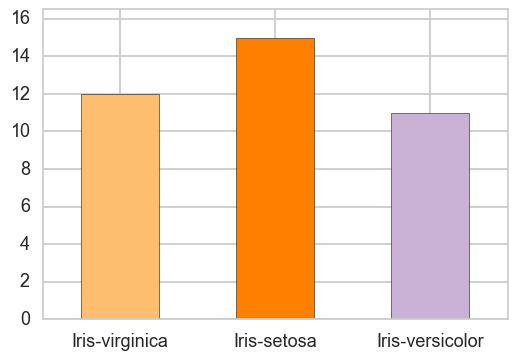

In [37]:
cls = DecisionTreeClassifier()
fit_and_test_model(cls, X_train, y_train, X_test, y_test)

## Logistic regression

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

    avg / total       1.00      1.00      1.00        38



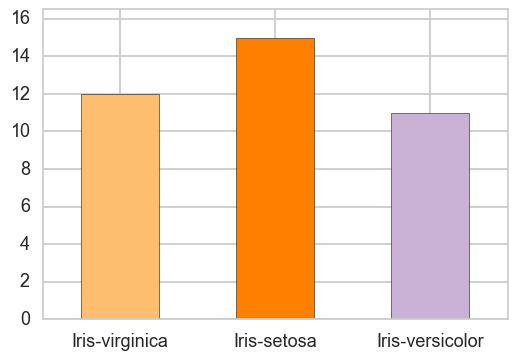

In [36]:
from sklearn.linear_model import LogisticRegression
cls2 = LogisticRegression()
fit_and_test_model(cls2, X_train, y_train, X_test, y_test)